<a href="https://colab.research.google.com/github/LeeYeonGeol/ML_DL_Practice/blob/main/Fashion_MNIST_%EC%97%B0%EC%8A%B5_(CNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

# Conv2D 적용하기

In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
print('x type:', type(x), 'x:', x)

x type: <class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'> x: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


# Pooling 적용하기

In [3]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x)
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 16), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


# CNN 모델 생성

In [4]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3,activation='relu')(x)
x = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.layers import Dense, Flatten
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3,activation='relu')(x)
x = MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 한다.
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1081700   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010

# Fashion MNIST 데이터 전처리후 모델 학습

In [6]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype= np.float32)

  return images, labels

def get_preprocessed_ohe(images, labels):
  images, labels = get_preprocessed_data(images, labels)
  # OHE 적용
  oh_labels = to_categorical(labels)
  return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
  train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
  test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

  tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

  return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 7s 10ms/step - loss: 0.6340 - accuracy: 0.7813 - val_loss: 0.3232 - val_accuracy: 0.8872
Epoch 2/30
399/399 [==============================] - 4s 9ms/step - loss: 0.2797 - accuracy: 0.8985 - val_loss: 0.2605 - val_accuracy: 0.9072
Epoch 3/30
399/399 [==============================] - 4s 9ms/step - loss: 0.2226 - accuracy: 0.9195 - val_loss: 0.2319 - val_accuracy: 0.9156
Epoch 4/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1837 - accuracy: 0.9325 - val_loss: 0.2222 - val_accuracy: 0.9189
Epoch 5/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1497 - accuracy: 0.9467 - val_loss: 0.2275 - val_accuracy: 0.9190
Epoch 6/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1241 - accuracy: 0.9567 - val_loss: 0.2298 - val_accuracy: 0.9213
Epoch 7/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1000 - accuracy: 0.9641 - val_loss: 0.2352 - val_accuracy: 0.9217
Epoch

# 모델 성능 평가

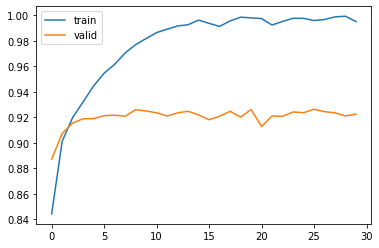

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.legend()

show_history(history)

In [10]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 6ms/step - loss: 0.5666 - accuracy: 0.9277


[0.5665686130523682, 0.9276999831199646]

# Droptout을 적용하여 Fully Connected Layer의 오버피팅 조정

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3,activation='relu')(x)
x = MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 한다.
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1081

In [12]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 4s 10ms/step - loss: 0.6299 - accuracy: 0.7805 - val_loss: 0.3194 - val_accuracy: 0.8862
Epoch 2/30
399/399 [==============================] - 4s 9ms/step - loss: 0.3142 - accuracy: 0.8872 - val_loss: 0.2644 - val_accuracy: 0.9011
Epoch 3/30
399/399 [==============================] - 4s 9ms/step - loss: 0.2533 - accuracy: 0.9060 - val_loss: 0.2355 - val_accuracy: 0.9118
Epoch 4/30
399/399 [==============================] - 4s 9ms/step - loss: 0.2166 - accuracy: 0.9192 - val_loss: 0.2321 - val_accuracy: 0.9149
Epoch 5/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1962 - accuracy: 0.9266 - val_loss: 0.2383 - val_accuracy: 0.9096
Epoch 6/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1747 - accuracy: 0.9343 - val_loss: 0.2137 - val_accuracy: 0.9230
Epoch 7/30
399/399 [==============================] - 4s 9ms/step - loss: 0.1538 - accuracy: 0.9426 - val_loss: 0.2149 - val_accuracy: 0.9212
Epoch

40/40 [==============================] - 0s 5ms/step - loss: 0.3308 - accuracy: 0.9299


[0.33078840374946594, 0.9298999905586243]

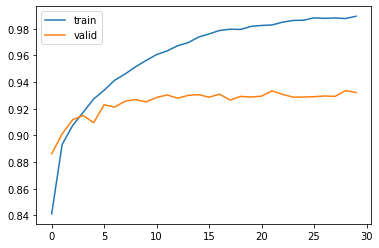

In [13]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

# Dropout 적극적으로 활용하기

In [15]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

def create_model():
  input_tensor = Input(shape = (28, 28, 1))
  x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
  x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
  x = MaxPooling2D(2)(x)

  x = Flatten()(x)
  x = Dropout(rate=0.5)(x)
  x = Dense(200, activation='relu')(x)
  x = Dropout(rate=0.2)(x)
  output = Dense(10, activation='softmax')(x)
  model = Model(inputs=input_tensor, outputs=output)
  model.summary()

  return model

model = create_model()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               2163

In [16]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 4s 10ms/step - loss: 0.6289 - accuracy: 0.7761 - val_loss: 0.3166 - val_accuracy: 0.8867
Epoch 2/30
399/399 [==============================] - 4s 10ms/step - loss: 0.2967 - accuracy: 0.8917 - val_loss: 0.2632 - val_accuracy: 0.9062
Epoch 3/30
399/399 [==============================] - 4s 10ms/step - loss: 0.2429 - accuracy: 0.9114 - val_loss: 0.2368 - val_accuracy: 0.9136
Epoch 4/30
399/399 [==============================] - 4s 10ms/step - loss: 0.2127 - accuracy: 0.9211 - val_loss: 0.2269 - val_accuracy: 0.9157
Epoch 5/30
399/399 [==============================] - 4s 10ms/step - loss: 0.1868 - accuracy: 0.9317 - val_loss: 0.2244 - val_accuracy: 0.9162
Epoch 6/30
399/399 [==============================] - 4s 10ms/step - loss: 0.1673 - accuracy: 0.9382 - val_loss: 0.2077 - val_accuracy: 0.9260
Epoch 7/30
399/399 [==============================] - 4s 10ms/step - loss: 0.1505 - accuracy: 0.9434 - val_loss: 0.1946 - val_accuracy: 0.9317

40/40 [==============================] - 0s 7ms/step - loss: 0.3050 - accuracy: 0.9314


[0.30503690242767334, 0.9314000010490417]

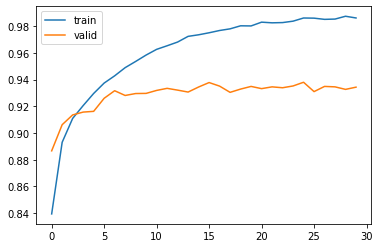

In [17]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)